Ch03 - Decorate Graphs with Plot Styles and Types
==

---
# Controlling the colors 

## Default color cycle

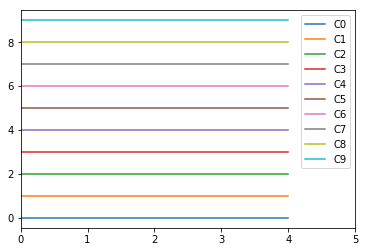

In [1]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.plot([i]*5,c='C'+str(i),label='C'+str(i))
plt.xlim(0,5)
plt.legend()
plt.show()

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle']

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


## Colormaps

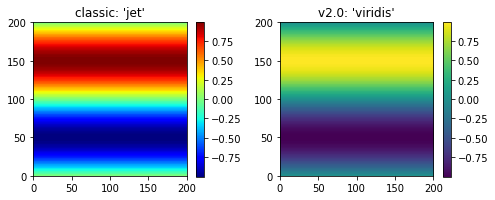

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = M = 200
X, Y = np.ogrid[0:20:N*1j, 0:20:M*10]
data = np.sin(np.pi * X*2 / 20) * np.cos(np.pi * Y*2 / 20)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(7, 3)) # cmap=viridis by default
im = ax1.imshow(data, extent=[0, 200, 0, 200])
ax1.set_title("v2.0: 'viridis'")
fig.colorbar(im, ax=ax1, shrink=0.85)

im2 = ax2.imshow(data, extent=[0, 200, 0, 200], cmap='jet')
fig.colorbar(im2, ax=ax2, shrink=0.85)
ax2.set_title("classic: 'jet'")

fig.tight_layout()
plt.show()

### Creating custom colormaps

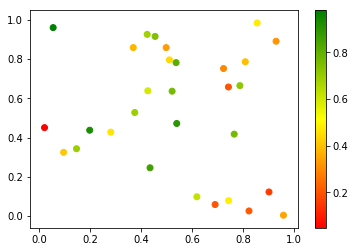

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Create a 30 random dots
np.random.seed(52)
x,y,c = zip(*np.random.rand(30,3))

# Create a custom linear colormap
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

plt.scatter(x,y,c=c, cmap=cmap)
plt.colorbar()
plt.show()

---
# Line and marker styles <!-- p5-7 -->

---
## Marker styles

### Choosing the shape of markers

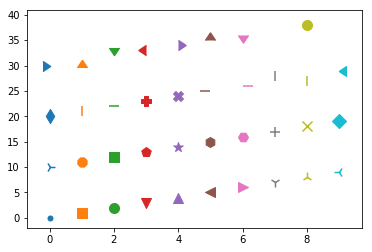

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

for i,marker in enumerate(Line2D.markers):
    plt.scatter(i%10,i,marker=marker,s=100) # plot each of the markers in size of 100

plt.show()

### Using custom characters as markers

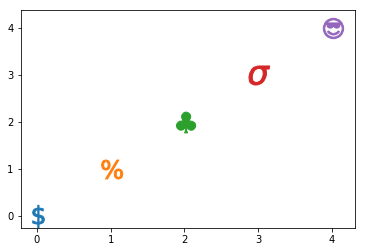

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

custom_markers = ['$'+x+'$' for x in ['\$','\%','\clubsuit','\sigma','😎']]
for i,marker in enumerate(custom_markers):
    plt.scatter(i%10,i,marker=marker,s=500) # plot each of the markers in size of 100

plt.show()

### Adjusting marker sizes and colors

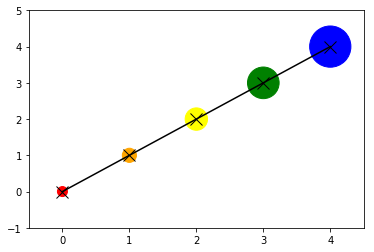

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Prepare a list of integers
n = list(range(5))

# Prepare a list of sizes that increases with values in n
s = [i**2*100+100 for i in n]

# Prepare a list of colors
c = ['red','orange','yellow','green','blue']

# Draw a scatter plot of n points with sizes in s and colors in c
plt.scatter(n,n,s=s,c=c)

# Draw a line plot with n points with black cross markers of size 12
plt.plot(n,marker='x',color='black',ms=12)

# Set axis limits to show the markers completely
plt.xlim(-0.5,4.5)
plt.ylim(-1,5)

plt.show()

### Fine-tuning marker styles with keyword arguments

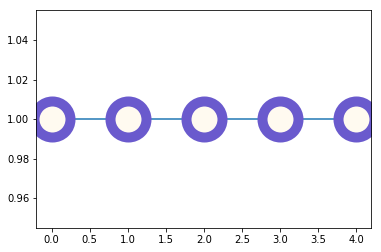

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Prepare data points
x = list(range(5))
y = [1]*5

# Set the face color, edge color, and edge width of markers
plt.plot(x,y,marker='o',ms=36,markerfacecolor='floralwhite',markeredgecolor='slateblue',markeredgewidth=10)
plt.show()

---
## Line styles

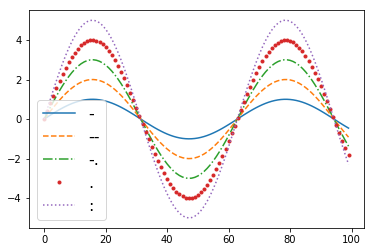

In [9]:
import matplotlib.pyplot as plt

# Prepare 4 data series of sine curves
y = [np.sin(i) for i in np.arange(0.0, 10.0, 0.1)]

dash_capstyles = ['-','--','-.','.',':']

# Plot each data series in different cap dash styles
for i,x in enumerate(dash_capstyles):
    plt.plot([n*(i+1) for n in y],x,label=x)

plt.legend(fontsize=16,loc='lower left')
plt.show()

### Cap styles

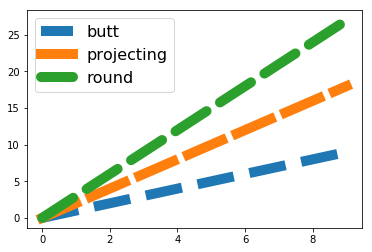

In [10]:
import matplotlib.pyplot as plt

# Prepare 4 data series of sine curves
y = list(range(10))

dash_capstyles = ['butt','projecting','round']

# Plot each data series in different cap dash styles
for i,x in enumerate(dash_capstyles):
    plt.plot([n*(i+1) for n in y],lw=10,ls='--',dash_capstyle=x,label=x)

plt.legend(fontsize=16)
plt.show()

---
## Spines

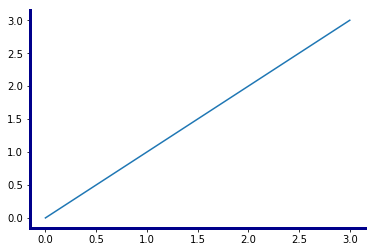

In [11]:
import matplotlib.pyplot as plt

y = list(range(4))
plt.plot(y)

# Store the current axes as ax
ax = plt.gca()

# Set the spine properties
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('darkblue')
ax.spines['bottom'].set_color('darkblue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

---
# Choosing the right plot

## Histogram

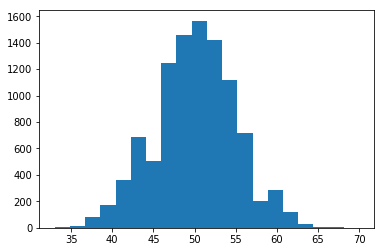

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8)
x = np.random.binomial(100, 0.5, size=10000)
plt.hist(x,bins=20) # or plt.hist(x,20)
plt.savefig('mpldev_03_hist.png',dpi=300)
plt.show()

## Barplot

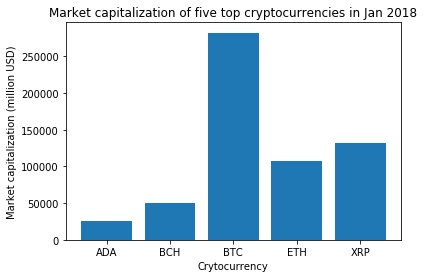

In [13]:
import matplotlib.pyplot as plt

# Data retrieved from https://coinmarketcap.com on Jan 8, 2018
# Prepare the data series
cc = ['BTC','XRP','ETH','BCH','ADA']
cap = [282034,131378,107393,49999,26137]

# Plot the bar chart
plt.bar(cc,cap)
plt.title('Market capitalization of five top cryptocurrencies in Jan 2018')
plt.xlabel('Crytocurrency')
plt.ylabel('Market capitalization (million USD)')
plt.savefig('mpldev_03_bar_unsorted.png',dpi=300)
plt.show()

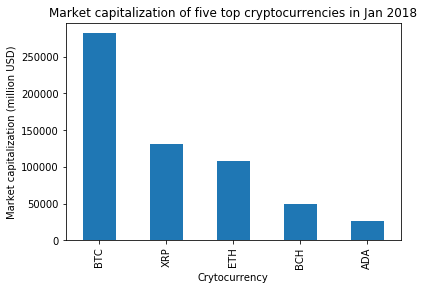

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'cc':cc,'cap':cap})

ax = df.plot(kind='bar',legend=False)
ax.set_xticklabels(df['cc'])

plt.title('Market capitalization of five top cryptocurrencies in Jan 2018')
plt.xlabel('Crytocurrency')
plt.ylabel('Market capitalization (million USD)')
plt.savefig('mpldev_03_bar_sorted.png',dpi=300)
plt.show()

### Drawing bar plots with multiple data series

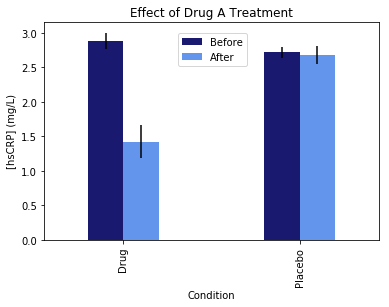

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Data retrieved from https://coinmarketcap.com on Jan 8, 2018
# Prepare the data series
labels_drug = ['Drug (Before)', 'Drug (After)']
labels_placebo = ['Placebo (Before)', 'Drug (After)']
drug = [2.88,1.42]
placebo = [2.72,2.68]
yerr_drug = [0.12,0.08]
yerr_placebo = [0.24,0.13]

df = pd.DataFrame([drug,placebo])
df.columns = ['Before', 'After']
df.index = ['Drug','Placebo']

# Plot the bar chart with error bars
df.plot(kind='bar',width=0.4,color=['midnightblue','cornflowerblue'],yerr=[yerr_drug,yerr_placebo])

plt.title('Effect of Drug A Treatment')
plt.xlabel('Condition')
plt.ylabel('[hsCRP] (mg/L)')
plt.legend(loc=(0.4,0.8))
plt.show()

## Mean-and-error plots

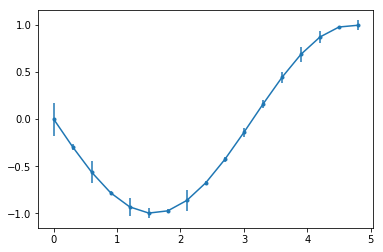

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 5, 0.3)
y = np.sin(-x)
np.random.seed(100)
e1 = 0.1 * np.abs(np.random.randn(len(y)))
plt.errorbar(x, y, yerr=e1, fmt='.-')
plt.show()

## Pie Chart

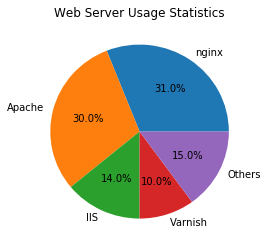

In [17]:
# Data obtained from https://trends.builtwith.com/web-server on Jan 06, 2017

import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))

x = [0.31,0.3,0.14,0.1,0.15]
labels = ['nginx','Apache','IIS','Varnish','Others']
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.title('Web Server Usage Statistics')
plt.savefig('mpldev_03_webserverpie.png',dpi=300)
plt.show()

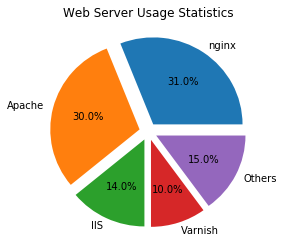

In [18]:
# Data obtained from https://trends.builtwith.com/web-server on Jan 06, 2017

import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))

x = [0.31,0.3,0.14,0.1,0.15]
labels = ['nginx','Apache','IIS','Varnish','Others']
plt.pie(x,labels=labels,autopct='%1.1f%%', explode=[0.1]*5)
plt.title('Web Server Usage Statistics')
plt.show()

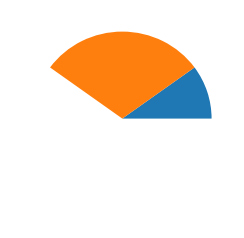

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
x = [0.1,0.3]
plt.pie(x)
plt.savefig('mpldev_03_incompletepie.png')
plt.show()

---
## Polar chart

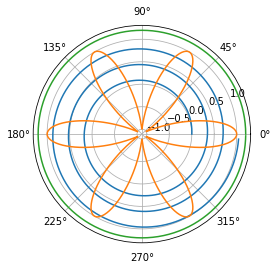

In [20]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0., 2., 1./180.)*np.pi
plt.polar(3*theta, theta/6)
plt.polar(theta, np.cos(6*theta))
plt.polar(theta, [1.2]*len(theta))

plt.savefig('mpldev_03_polarrose.png',dpi=300)
plt.show()

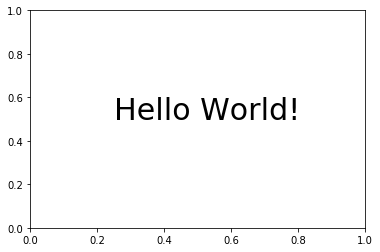

In [21]:
plt.text(0.25,0.5,'Hello World!',fontsize=30)
plt.savefig('mpldev_03_texthelloword.png')
plt.show()

## Text elements

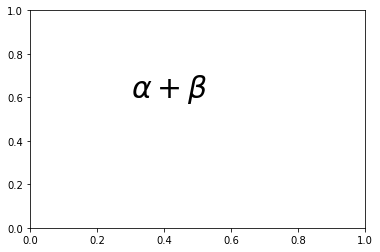

In [22]:
plt.annotate(r'$\alpha + \beta$',(0.3,0.6),fontsize=30)
plt.show()

## Arrows

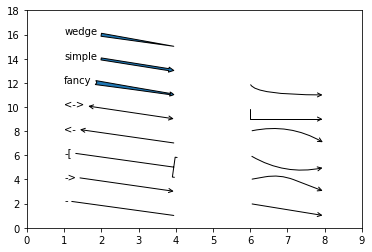

In [23]:
import matplotlib.pyplot as plt

plt.axis([0, 9, 0, 18])
arrstyles = ['-', '->', '-[', '<-', '<->', 'fancy', 'simple', 'wedge']
for i, style in enumerate(arrstyles):
    plt.annotate(style, xytext=(1, 2+2*i), xy=(4, 1+2*i), \
                 arrowprops=dict(arrowstyle=style))
connstyles=["arc", "arc,angleA=10,armA=30,rad=15", \
            "arc3,rad=.2", "arc3,rad=-.2", "angle", "angle3"]

for i, style in enumerate(connstyles):
    plt.annotate("", xytext=(6, 2+2*i), xy=(8, 1+2*i), \
                 arrowprops=dict(arrowstyle='->', connectionstyle=style))

plt.savefig('mpldev_03_arrows.png',dpi=300)
plt.show()

---
# Using style sheets

## Available styles

In [24]:
import matplotlib as mpl
mpl.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']